In [1]:
import numpy as np
import scipy as sp
import matplotlib as mp
import pandas as pd
import datetime

import sys, os
import dateutil.parser as dp
import requests # See http://docs.python-requests.org/


#### CF standard names:

+air_temperature

-rainfall_amount

+wind_speed

In [2]:
#d = {'Date': [""], 'Time': ["00:00"], 'Temp': [20.3]}




In [3]:
temp_df = pd.DataFrame(columns=['Date_Time', 'Temp'])

if __name__ == "__main__":

    client_id = "ab0c8d35-c0fb-442a-b506-6c11cdd9805d"

    # issue an HTTP GET request
    r = requests.get(
        'https://frost.met.no/observations/v0.jsonld',
        {'sources': 'SN18700', 'elements': 'air_temperature', 'referencetime': '2017-07-18/2018-07-18'},
        auth=(client_id, '')
    )

    # extract the time series from the response
    if r.status_code == 200:
        for item in r.json()['data']:
            iso8601 = item['referenceTime']
            d_str = iso8601[:10] + " " + iso8601[11:19]
            dt = datetime.datetime.strptime(d_str, "%Y-%m-%d %H:%M:%S")
            temp = item['observations'][0]['value']
            d = {'Date_Time': [dt], 'Temp': [temp]}
            df2 = pd.DataFrame(data=d)
            temp_df = temp_df.append(df2, ignore_index=True)
            #sys.stdout.write('{} {} {}\n'.format(iso8601[:10], iso8601[11:16], item['observations'][0]['value'])) 

In [4]:
rain_df = pd.DataFrame(columns=['Date_Time', 'Rain'])

if __name__ == "__main__":

    client_id = "ab0c8d35-c0fb-442a-b506-6c11cdd9805d"

    # issue an HTTP GET request
    r = requests.get(
        'https://frost.met.no/observations/v0.jsonld',
        {'sources': 'SN18700', 'elements': 'sum(precipitation_amount PT1H)', 'referencetime': '2017-07-18/2018-07-18'},
        auth=(client_id, '')
    )

    # extract the time series from the response
    if r.status_code == 200:
        for item in r.json()['data']:
            iso8601 = item['referenceTime']
            d_str = iso8601[:10] + " " + iso8601[11:19]
            dt = datetime.datetime.strptime(d_str, "%Y-%m-%d %H:%M:%S")
            rain = item['observations'][0]['value']
            d = {'Date_Time': [dt], 'Rain': [rain]}
            df2 = pd.DataFrame(data=d)
            rain_df = rain_df.append(df2, ignore_index=True)

In [5]:
wind_df = pd.DataFrame(columns=['Date_Time', 'Time', 'Wind'])

if __name__ == "__main__":

    client_id = "ab0c8d35-c0fb-442a-b506-6c11cdd9805d"

    # issue an HTTP GET request
    r = requests.get(
        'https://frost.met.no/observations/v0.jsonld',
        {'sources': 'SN18700', 'elements': 'mean(wind_speed)', 'referencetime': '2017-07-17/2018-07-17'},
        auth=(client_id, '')
    )

    # extract the time series from the response
    if r.status_code == 200:
        for item in r.json()['data']:
            iso8601 = item['referenceTime']
            #d_str = iso8601[:10] + " " + iso8601[11:19]
            #dt = datetime.datetime.strptime(d_str, "%Y-%m-%d %H:%M:%S")
            #wind = item['observations'][0]['value']
            #d = {'Date_Time': [dt], 'Wind': [wind]}
            #df2 = pd.DataFrame(data=d)
            #wind_df = wind_df.append(df2, ignore_index=True)
            sys.stdout.write('{} {} {}\n'.format(iso8601[:10], iso8601[11:16], item['observations'][0]['value'])) 

In [6]:
r

<Response [404]>

In [7]:
luftDF = pd.read_excel('data/TimeValues.xls', sheetname='Verdier')

C:\Anaconda\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [8]:
luftDF.tail(10)

,Fra-tid,Til-tid,Kirkeveien | NO2 | µg/m³,Datadekning (%),Instrumentflagg,QA-flagg,QC-flagg,Kirkeveien | PM10 - PM2.5 | µg/m³,Datadekning (%).1,Instrumentflagg.1,QA-flagg.1,QC-flagg.1,Kirkeveien | PM2.5 | µg/m³,Datadekning (%).2,Instrumentflagg.2,QA-flagg.2,QC-flagg.2
8750,2018-07-17 14:00:00,2018-07-17 15:00:00,15.387366,100,-9900,0,2,6.111885,-9900,-9900,0,-9900,8.796026,100,-9900,0,3
8751,2018-07-17 15:00:00,2018-07-17 16:00:00,15.812585,100,-9900,0,2,3.656814,-9900,-9900,0,-9900,9.705710,100,-9900,0,3
8752,2018-07-17 16:00:00,2018-07-17 17:00:00,15.263722,100,-9900,0,2,3.405861,-9900,-9900,0,-9900,8.459045,100,-9900,0,3
8753,2018-07-17 17:00:00,2018-07-17 18:00:00,19.388335,100,-9900,0,2,3.712368,-9900,-9900,0,-9900,8.628058,100,-9900,0,3
8754,2018-07-17 18:00:00,2018-07-17 19:00:00,19.745060,100,-9900,0,2,4.165814,-9900,-9900,0,-9900,7.704638,100,-9900,0,3
8755,2018-07-17 19:00:00,2018-07-17 20:00:00,29.274286,100,-9900,0,2,6.243272,-9900,-9900,0,-9900,10.104075,100,-9900,0,3
8756,2018-07-17 20:00:00,2018-07-17 21:00:00,22.710248,100,-9900,0,2,5.840334,-9900,-9900,0,-9900,9.146337,100,-9900,0,3
8757,2018-07-17 21:00:00,2018-07-17 22:00:00,34.228025,100,-9900,0,2,8.204184,-9900,-9900,0,-9900,13.669004,100,-9900,0,3
8758,2018-07-17 22:00:00,2018-07-17 23:00:00,27.238961,100,-9900,0,2,7.831386,-9900,-9900,0,-9900,11.206793,100,-9900,0,3
8759,2018-07-17 23:00:00,2018-07-18 00:00:00,15.144754,100,-9900,0,2,5.485252,-9900,-9900,0,-9900,12.158680,100,-9900,0,3


In [9]:
list(luftDF)

['Fra-tid',
 'Til-tid',
 'Kirkeveien | NO2 | µg/m³',
 'Datadekning (%)',
 'Instrumentflagg',
 'QA-flagg',
 'QC-flagg',
 'Kirkeveien | PM10 - PM2.5 | µg/m³',
 'Datadekning (%).1',
 'Instrumentflagg.1',
 'QA-flagg.1',
 'QC-flagg.1',
 'Kirkeveien | PM2.5 | µg/m³',
 'Datadekning (%).2',
 'Instrumentflagg.2',
 'QA-flagg.2',
 'QC-flagg.2']

In [10]:

tmp_luftDF = luftDF[['Fra-tid','Kirkeveien | NO2 | µg/m³','Kirkeveien | PM10 - PM2.5 | µg/m³', 'Kirkeveien | PM2.5 | µg/m³']]
#.rename(index=str, columns={"A": "a", "B": "c"})

tmp_luftDF.columns = ['Date_Time','NO2','PM10 - PM2.5','PM2.5']

tmp_luftDF['Location'] = 'Kirkeveien'




C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [11]:
tmp_luftDF.head(10)

,Date_Time,NO2,PM10 - PM2.5,PM2.5,Location
0,2017-07-18 00:00:00,3.460728,-9900.000000,-5.751741,Kirkeveien
1,2017-07-18 01:00:00,4.949490,0.750714,1.765142,Kirkeveien
2,2017-07-18 02:00:00,6.440464,0.265847,5.423282,Kirkeveien
3,2017-07-18 03:00:00,11.121951,0.521606,7.552969,Kirkeveien
4,2017-07-18 04:00:00,16.990981,2.540627,2.808256,Kirkeveien
5,2017-07-18 05:00:00,13.873495,3.218211,3.709590,Kirkeveien
6,2017-07-18 06:00:00,21.142148,3.783919,0.464662,Kirkeveien
7,2017-07-18 07:00:00,17.417929,3.474035,6.557440,Kirkeveien
8,2017-07-18 08:00:00,14.782133,3.450840,7.696757,Kirkeveien
9,2017-07-18 09:00:00,6.529744,2.181036,7.126538,Kirkeveien


In [12]:
temp_df.head(10)

,Date_Time,Temp
0,2017-07-18 00:00:00,12
1,2017-07-18 01:00:00,11.8
2,2017-07-18 02:00:00,10.9
3,2017-07-18 03:00:00,10.1
4,2017-07-18 04:00:00,11.9
5,2017-07-18 05:00:00,13.7
6,2017-07-18 06:00:00,14.7
7,2017-07-18 07:00:00,16
8,2017-07-18 08:00:00,17.4
9,2017-07-18 09:00:00,18.4


In [13]:
result = pd.merge(tmp_luftDF, temp_df, on='Date_Time')
result = pd.merge(result, rain_df, on='Date_Time')

In [14]:
result.head(10)

,Date_Time,NO2,PM10 - PM2.5,PM2.5,Location,Temp,Rain
0,2017-07-18 00:00:00,3.460728,-9900.000000,-5.751741,Kirkeveien,12,0
1,2017-07-18 01:00:00,4.949490,0.750714,1.765142,Kirkeveien,11.8,0
2,2017-07-18 02:00:00,6.440464,0.265847,5.423282,Kirkeveien,10.9,0
3,2017-07-18 03:00:00,11.121951,0.521606,7.552969,Kirkeveien,10.1,0
4,2017-07-18 04:00:00,16.990981,2.540627,2.808256,Kirkeveien,11.9,0
5,2017-07-18 05:00:00,13.873495,3.218211,3.709590,Kirkeveien,13.7,0
6,2017-07-18 06:00:00,21.142148,3.783919,0.464662,Kirkeveien,14.7,0
7,2017-07-18 07:00:00,17.417929,3.474035,6.557440,Kirkeveien,16,0
8,2017-07-18 08:00:00,14.782133,3.450840,7.696757,Kirkeveien,17.4,0
9,2017-07-18 09:00:00,6.529744,2.181036,7.126538,Kirkeveien,18.4,0


In [18]:
wind_df = pd.DataFrame(columns=['Date_Time', 'Wind'])

if __name__ == "__main__":

    client_id = "ab0c8d35-c0fb-442a-b506-6c11cdd9805d"

    # issue an HTTP GET request
    r = requests.get(
        'https://frost.met.no/observations/v0.jsonld',
        {'sources': 'SN18700', 'elements': 'wind_speed', 'referencetime': '2017-07-18/2018-07-18'},
        auth=(client_id, '')
    )

    # extract the time series from the response
    if r.status_code == 200:
        tmpWind = 0
        for item in r.json()['data']:
            iso8601 = item['referenceTime']
            d_str = iso8601[:10] + " " + iso8601[11:19]
            dt = datetime.datetime.strptime(d_str, "%Y-%m-%d %H:%M:%S") 
            wind = item['observations'][0]['value']
            tmpWind = tmpWind + wind
            if dt.minute == 50:
                wind = round(tmpWind/6,1)
                dt = dt.replace(minute=0)
                d = {'Date_Time': [dt], 'Wind': [wind]}
                df2 = pd.DataFrame(data=d)
                wind_df = wind_df.append(df2, ignore_index=True)
                tmpWind = 0
                  
            #sys.stdout.write('{} {} {}\n'.format(iso8601[:10], iso8601[11:16], item['observations'][0]['value'])) 

In [19]:

wind_df.head(10)

,Date_Time,Wind
0,2017-07-18 00:00:00,0.7
1,2017-07-18 01:00:00,0.8
2,2017-07-18 02:00:00,0.8
3,2017-07-18 03:00:00,0.9
4,2017-07-18 04:00:00,1.8
5,2017-07-18 05:00:00,2.3
6,2017-07-18 06:00:00,3.0
7,2017-07-18 07:00:00,2.9
8,2017-07-18 08:00:00,3.4
9,2017-07-18 09:00:00,3.8


In [20]:
result = pd.merge(result, wind_df, on='Date_Time')

In [ ]:
#testDF = pd.melt(yoloDF, id_vars=['Fra-tid'], value_name='Verdi', var_name="lokasjon_enhet")

In [ ]:
#testDF

In [ ]:

#tmp_df = testDF["lokasjon_enhet"].str.extract("([^\|]+)")
# Extract Sex, Age lower bound and Age upper bound group
#tmp_df = df["sex_and_age"].str.extract("(\D)(\d+)(\d{2})")    

# Name columns
#tmp_df.columns = ["Lokasjon"]

# Create `age`column based on `age_lower` and `age_upper`
#tmp_df["age"] = tmp_df["age_lower"] + "-" + tmp_df["age_upper"]

# Merge 
#testDF = pd.concat([testDF, tmp_df], axis=1)



In [ ]:
#testDF = testDF.drop(["lokasjon_enhet"],axis=1)
#testDF.head(10)

In [ ]:
#df = df[df.line_race != 0]
#testDF = testDF[testDF.Verdi != -9900]
#testDF.count()

In [ ]:
#nulltall = testDF[testDF.Verdi < 1.0]
#nulltall = nulltall[nulltall.Verdi != 0]

#nulltall.count()

#df[df < 2.0 ].count()

In [21]:
result.head(10)

,Date_Time,NO2,PM10 - PM2.5,PM2.5,Location,Temp,Rain,Wind
0,2017-07-18 00:00:00,3.460728,-9900.000000,-5.751741,Kirkeveien,12,0,0.7
1,2017-07-18 01:00:00,4.949490,0.750714,1.765142,Kirkeveien,11.8,0,0.8
2,2017-07-18 02:00:00,6.440464,0.265847,5.423282,Kirkeveien,10.9,0,0.8
3,2017-07-18 03:00:00,11.121951,0.521606,7.552969,Kirkeveien,10.1,0,0.9
4,2017-07-18 04:00:00,16.990981,2.540627,2.808256,Kirkeveien,11.9,0,1.8
5,2017-07-18 05:00:00,13.873495,3.218211,3.709590,Kirkeveien,13.7,0,2.3
6,2017-07-18 06:00:00,21.142148,3.783919,0.464662,Kirkeveien,14.7,0,3.0
7,2017-07-18 07:00:00,17.417929,3.474035,6.557440,Kirkeveien,16,0,2.9
8,2017-07-18 08:00:00,14.782133,3.450840,7.696757,Kirkeveien,17.4,0,3.4
9,2017-07-18 09:00:00,6.529744,2.181036,7.126538,Kirkeveien,18.4,0,3.8


In [24]:
result.to_csv("data.csv", encoding='utf-8', index=False)

In [17]:
test_data = pd.read_csv("data.csv")

In [18]:
test_data.tail(10)

,Date_Time,NO2,PM10 - PM2.5,PM2.5,Location,Temp,Rain,Wind
8749,2018-07-17 14:00:00,15.387366,6.111885,8.796026,Kirkeveien,30.7,0.0,2.7
8750,2018-07-17 15:00:00,15.812585,3.656814,9.705710,Kirkeveien,30.0,0.0,2.5
8751,2018-07-17 16:00:00,15.263722,3.405861,8.459045,Kirkeveien,30.4,0.0,2.5
8752,2018-07-17 17:00:00,19.388335,3.712368,8.628058,Kirkeveien,29.3,0.0,2.0
8753,2018-07-17 18:00:00,19.745060,4.165814,7.704638,Kirkeveien,28.3,0.0,1.5
8754,2018-07-17 19:00:00,29.274286,6.243272,10.104075,Kirkeveien,27.1,0.0,1.0
8755,2018-07-17 20:00:00,22.710248,5.840334,9.146337,Kirkeveien,26.5,0.0,0.7
8756,2018-07-17 21:00:00,34.228025,8.204184,13.669004,Kirkeveien,24.4,0.0,2.1
8757,2018-07-17 22:00:00,27.238961,7.831386,11.206793,Kirkeveien,23.4,0.0,2.7
8758,2018-07-17 23:00:00,15.144754,5.485252,12.158680,Kirkeveien,23.2,0.0,1.1


In [19]:
test_data.count()

Date_Time       8759
NO2             8759
PM10 - PM2.5    8759
PM2.5           8759
Location        8759
Temp            8759
Rain            8759
Wind            8759
dtype: int64

In [26]:
test_data.Date_Time

0      2017-07-18 00:00:00
1      2017-07-18 01:00:00
2      2017-07-18 02:00:00
3      2017-07-18 03:00:00
4      2017-07-18 04:00:00
5      2017-07-18 05:00:00
6      2017-07-18 06:00:00
7      2017-07-18 07:00:00
8      2017-07-18 08:00:00
9      2017-07-18 09:00:00
10     2017-07-18 10:00:00
11     2017-07-18 11:00:00
12     2017-07-18 12:00:00
13     2017-07-18 13:00:00
14     2017-07-18 14:00:00
15     2017-07-18 15:00:00
16     2017-07-18 16:00:00
17     2017-07-18 17:00:00
18     2017-07-18 18:00:00
19     2017-07-18 19:00:00
20     2017-07-18 20:00:00
21     2017-07-18 21:00:00
22     2017-07-18 22:00:00
23     2017-07-18 23:00:00
24     2017-07-19 00:00:00
25     2017-07-19 01:00:00
26     2017-07-19 02:00:00
27     2017-07-19 03:00:00
28     2017-07-19 04:00:00
29     2017-07-19 05:00:00
               ...        
8729   2018-07-16 18:00:00
8730   2018-07-16 19:00:00
8731   2018-07-16 20:00:00
8732   2018-07-16 21:00:00
8733   2018-07-16 22:00:00
8734   2018-07-16 23:00:00
8

In [27]:
test_data['Hour'] = '0'

b = test_data['Date_Time'].values
b2 = test_data['Hour'].values
for i in range(len(b)):
    d_str = str(b[i])
    b2[i] =  d_str[11:13]
test_data.head(10)


,Date_Time,NO2,PM10 - PM2.5,PM2.5,Location,Temp,Rain,Wind,Hour
0,2017-07-18 00:00:00,3.460728,-9900.000000,-5.751741,Kirkeveien,12.0,0.0,0.7,00
1,2017-07-18 01:00:00,4.949490,0.750714,1.765142,Kirkeveien,11.8,0.0,0.8,01
2,2017-07-18 02:00:00,6.440464,0.265847,5.423282,Kirkeveien,10.9,0.0,0.8,02
3,2017-07-18 03:00:00,11.121951,0.521606,7.552969,Kirkeveien,10.1,0.0,0.9,03
4,2017-07-18 04:00:00,16.990981,2.540627,2.808256,Kirkeveien,11.9,0.0,1.8,04
5,2017-07-18 05:00:00,13.873495,3.218211,3.709590,Kirkeveien,13.7,0.0,2.3,05
6,2017-07-18 06:00:00,21.142148,3.783919,0.464662,Kirkeveien,14.7,0.0,3.0,06
7,2017-07-18 07:00:00,17.417929,3.474035,6.557440,Kirkeveien,16.0,0.0,2.9,07
8,2017-07-18 08:00:00,14.782133,3.450840,7.696757,Kirkeveien,17.4,0.0,3.4,08
9,2017-07-18 09:00:00,6.529744,2.181036,7.126538,Kirkeveien,18.4,0.0,3.8,09


In [28]:
#Determine pivot table
noNeg = test_data[test_data['NO2'] > 0]
impute_grps = noNeg.pivot_table(values=["NO2"], index=["Hour"], aggfunc=np.mean)
print(impute_grps)



            NO2
Hour           
00    15.953582
01    14.235578
02    13.445275
03    13.835090
04    13.540419
05    16.234882
06    22.081985
07    27.000486
08    28.123384
09    29.067952
10    28.703828
11    27.764187
12    27.707058
13    28.460008
14    28.526494
15    30.554761
16    31.054979
17    30.636093
18    30.161795
19    29.284674
20    27.426986
21    25.522677
22    22.524789
23    18.734146


In [32]:
array = np.array(impute_grps)

array([15.95358241])

In [24]:
test_data['Date_Time'] = pd.to_datetime(test_data['Date_Time'])



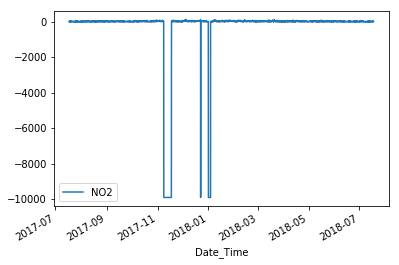

In [15]:
test_data.plot(x='Date_Time',y='NO2')

In [37]:

pm = test_data['NO2'].values
h = test_data['Hour'].values

for i in range(len(pm)):
    if pm[i] < 0:
        pm[i] = array[int(h[i])]


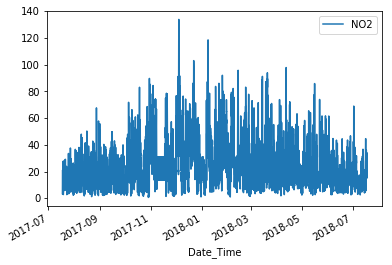

In [38]:
test_data.plot(x='Date_Time',y='NO2')

In [39]:
test_data.head(10)

,Date_Time,NO2,PM10 - PM2.5,PM2.5,Location,Temp,Rain,Wind,Hour
0,2017-07-18 00:00:00,3.460728,-9900.000000,-5.751741,Kirkeveien,12.0,0.0,0.7,00
1,2017-07-18 01:00:00,4.949490,0.750714,1.765142,Kirkeveien,11.8,0.0,0.8,01
2,2017-07-18 02:00:00,6.440464,0.265847,5.423282,Kirkeveien,10.9,0.0,0.8,02
3,2017-07-18 03:00:00,11.121951,0.521606,7.552969,Kirkeveien,10.1,0.0,0.9,03
4,2017-07-18 04:00:00,16.990981,2.540627,2.808256,Kirkeveien,11.9,0.0,1.8,04
5,2017-07-18 05:00:00,13.873495,3.218211,3.709590,Kirkeveien,13.7,0.0,2.3,05
6,2017-07-18 06:00:00,21.142148,3.783919,0.464662,Kirkeveien,14.7,0.0,3.0,06
7,2017-07-18 07:00:00,17.417929,3.474035,6.557440,Kirkeveien,16.0,0.0,2.9,07
8,2017-07-18 08:00:00,14.782133,3.450840,7.696757,Kirkeveien,17.4,0.0,3.4,08
9,2017-07-18 09:00:00,6.529744,2.181036,7.126538,Kirkeveien,18.4,0.0,3.8,09


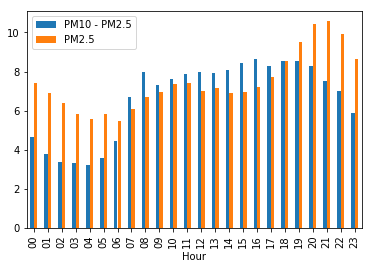

In [77]:
noNeg = test_data[test_data['PM2.5'] > 0]
noNeg = noNeg[noNeg['PM2.5'] < 500]
noNeg = noNeg[noNeg['PM10 - PM2.5'] > 0]
impute_grps = noNeg.pivot_table(values=["PM2.5","PM10 - PM2.5"], index=["Hour"],aggfunc=np.mean)

pd.DataFrame(impute_grps).plot.bar()
#impute_grps.plot(x='Hour',y='PM2.5')

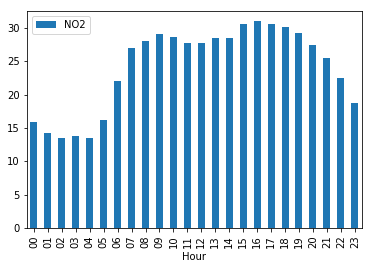

In [64]:
my_graph = test_data[['NO2','Hour']]
my_graph.plot.bar()

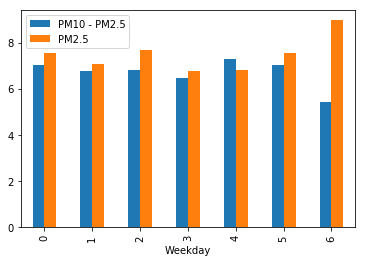

In [79]:
noNeg = test_data[test_data['PM10 - PM2.5'] > 0]
noNeg = noNeg[noNeg['PM2.5'] > 0]
noNeg = noNeg[noNeg['PM2.5'] < 500]

noNeg["Weekday"] = noNeg.Date_Time.dt.weekday
impute_grps = noNeg.pivot_table(values=["PM10 - PM2.5","PM2.5"], index=["Weekday"], aggfunc=np.mean)

pd.DataFrame(impute_grps).plot.bar()

In [80]:
test_data.head(10)

,Date_Time,NO2,PM10 - PM2.5,PM2.5,Location,Temp,Rain,Wind,Hour
0,2017-07-18 00:00:00,3.460728,-9900.000000,-5.751741,Kirkeveien,12.0,0.0,0.7,00
1,2017-07-18 01:00:00,4.949490,0.750714,1.765142,Kirkeveien,11.8,0.0,0.8,01
2,2017-07-18 02:00:00,6.440464,0.265847,5.423282,Kirkeveien,10.9,0.0,0.8,02
3,2017-07-18 03:00:00,11.121951,0.521606,7.552969,Kirkeveien,10.1,0.0,0.9,03
4,2017-07-18 04:00:00,16.990981,2.540627,2.808256,Kirkeveien,11.9,0.0,1.8,04
5,2017-07-18 05:00:00,13.873495,3.218211,3.709590,Kirkeveien,13.7,0.0,2.3,05
6,2017-07-18 06:00:00,21.142148,3.783919,0.464662,Kirkeveien,14.7,0.0,3.0,06
7,2017-07-18 07:00:00,17.417929,3.474035,6.557440,Kirkeveien,16.0,0.0,2.9,07
8,2017-07-18 08:00:00,14.782133,3.450840,7.696757,Kirkeveien,17.4,0.0,3.4,08
9,2017-07-18 09:00:00,6.529744,2.181036,7.126538,Kirkeveien,18.4,0.0,3.8,09


In [89]:
test_data["Weekday"] = test_data.Date_Time.dt.weekday

In [91]:
test_data.count()

Date_Time       8759
NO2             8759
PM10 - PM2.5    8759
PM2.5           8759
Location        8759
Temp            8759
Rain            8759
Wind            8759
Hour            8759
Weekday         8759
dtype: int64

In [92]:
test_data.to_csv("fixed_data.csv", encoding='utf-8', index=False)